# Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [4]:
df = pd.read_csv("heart.csv")

In [48]:
df.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
max(df["chol"])

564

In [8]:
#Spliting Features and Dependent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Visualization of Data

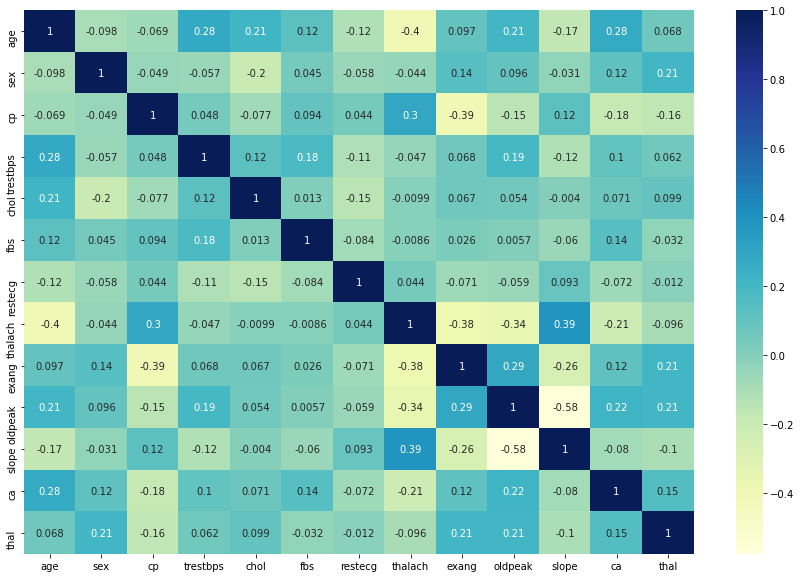

In [11]:
#Finding Correlation between Features and dropping any features whose correlation is high (>0.8)
import seaborn as sns
plt.rcParams['figure.figsize'] = (15.0, 10.0)
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Since we find the correlation between any two columns is less than 0.8, we are not dropping any columns


In [12]:
print(y.value_counts())
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

print("Percentage of Patients not having Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients having Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

1    165
0    138
Name: target, dtype: int64
Percentage of Patients not having Heart Disease: 45.54%
Percentage of Patients having Heart Disease: 54.46%


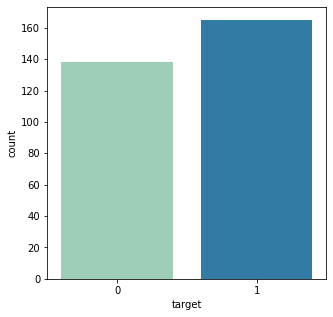

In [13]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x="target", data=df, palette="YlGnBu")
plt.show()

##Plotting the variation of heart disease with age

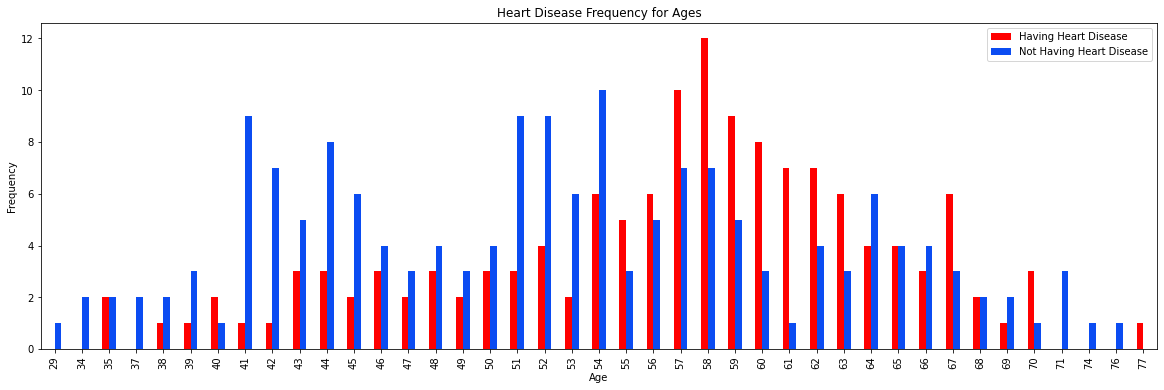

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6),color=['#ff0000','#0B4CF2' ])
plt.title('Heart Disease Frequency for Ages')
plt.legend(['Having Heart Disease', 'Not Having Heart Disease'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()



## Plotting the variation of heart disease with age and maximum Heart Rate

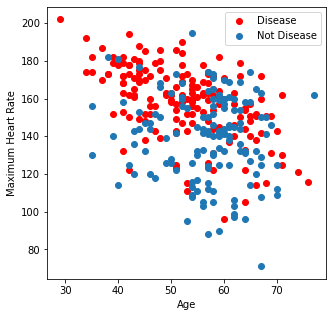

In [15]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

#Training and Testing of regression Models

###Spliting the data into Training and Testing data

In [16]:
from sklearn.model_selection import train_test_split
X=X.values
y=y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Standardising the data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainSd = sc.fit_transform(X_train)
X_testSd = sc.transform(X_test)

### KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnc.fit(X_trainSd, y_train)

KNeighborsClassifier()

In [19]:
y_pred1 = knnc.predict(X_testSd)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[21  6]
 [ 5 29]]


0.819672131147541

### SVM Model

In [21]:
from sklearn.svm import SVC
SVMc = SVC(kernel = 'linear', random_state = 0)
SVMc.fit(X_trainSd, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred2 = SVMc.predict(X_testSd)

In [23]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[20  7]
 [ 4 30]]


0.819672131147541

## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred3 = DTC.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[22  5]
 [ 7 27]]


0.8032786885245902

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
y_pred4 = RFC.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[23  4]
 [ 5 29]]


0.8524590163934426

## XGBoost Classifier

In [30]:
from xgboost import XGBClassifier
XGBc = XGBClassifier()
XGBc.fit(X_train, y_train)

[07:58:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mkg47/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_pred5 = XGBc.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[21  6]
 [ 7 27]]


0.7868852459016393

# We will be ensembling to get more precise result. Therefore, all te models are trained on the whole dataset

# Ensembling

## Combining the results of all the models to get the output


In [32]:
yavg=[]
for i in range(len(y_pred1)):
  temp=y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]+y_pred5[i]
  temp=temp/5
  if temp>=0.5:
    yavg.append(1)
  else:
    yavg.append(0)


In [33]:
cm = confusion_matrix(y_test, yavg)
print(cm)
accuracy_score(y_test, yavg)

[[21  6]
 [ 4 30]]


0.8360655737704918

# Creating and Saving the Final Model for hosting in Heroku 

### Training KNN Classifier on the whole dataset

In [34]:
from sklearn.neighbors import KNeighborsClassifier
finalmodel1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
finalmodel1.fit(X, y)

KNeighborsClassifier()

### Training SVM Classifier on the whole dataset

In [35]:
from sklearn.svm import SVC
finalmodel2 = SVC(kernel = 'linear', random_state = 0)
finalmodel2.fit(X, y)

SVC(kernel='linear', random_state=0)

 ### Training Decision Tree Classifier on the whole dataset

In [36]:
from sklearn.tree import DecisionTreeClassifier
finalmodel3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
finalmodel3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Training Random Forest Classifier on the whole dataset


In [37]:
from sklearn.ensemble import RandomForestClassifier
finalmodel4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
finalmodel4.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Training XGBoost Classifier on the whole dataset

In [38]:
from xgboost import XGBClassifier
finalmodel5 = XGBClassifier()
finalmodel5.fit(X, y)

[07:58:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mkg47/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
import pickle
filename = 'model1.pkl'
pickle.dump(finalmodel1, open(filename, 'wb'))

In [40]:
filename = 'model2.pkl'
pickle.dump(finalmodel2, open(filename, 'wb'))

In [41]:
filename = 'model3.pkl'
pickle.dump(finalmodel3, open(filename, 'wb'))

In [42]:
filename = 'model4.pkl'
pickle.dump(finalmodel4, open(filename, 'wb'))

In [43]:
filename = 'model5.pkl'
pickle.dump(finalmodel5, open(filename, 'wb'))

In [44]:
filename = 'standard.pkl'
pickle.dump(sc, open(filename, 'wb'))
